# CapgMyo comparison

Select four random channels and compare with ENG

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import gc
gc.collect()

import sys
sys.path.append('../../Share/')
sys.path.append('../../Share/Manual_processing/')
import Model, utils, Same_with_MATLAB, Feature_info

import capgmyo_modules
f_path = 'C:/Users/hml76/Desktop/Jupyter/Datasets/CapgMyo/DB_B_preproceesed/'

In [2]:
idx = np.random.choice(128, size=4, replace=False)
def inter_session_run(idx):
    ACC_lst = []

    for SUB in range(1,21):
        print('Sub {}'.format(SUB))
        rep_lst = []
        for rep in [5,9]:
            X_train, y_train, X_test, y_test = [], [], [], []
            for rep2 in [5,9]:
                if rep == rep2:
                    X_test, y_test = capgmyo_modules.import_dataset(subject=SUB, rep=rep, path=f_path, win_len=100, win_inc=50, sel_four_ch=idx)
                else:
                    X, y = capgmyo_modules.import_dataset(subject=SUB, rep=rep, path=f_path, win_len=100, win_inc=50, sel_four_ch=idx)
                    X_train.append(X)
                    y_train.append(y)
            X_train = np.concatenate(X_train, axis=0)
            y_train = np.concatenate(y_train, axis=0)

            X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
            X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

            model = Model.Original_model_1DCNN(input_size=X_train.shape[1:], num_class=8)

            history, model = Model.Train_model(model, X_train, y_train, X_test, y_test, set_epoch=100, set_batch_size=512, Model_name='V0',
                                                set_verbose=False, save_model_set=False)
            acc = model.evaluate(X_test, y_test, verbose=0)[1]
            rep_lst.append(acc)
            print(f'\t rep {rep} - acc lst - mean : {np.mean(rep_lst)}')

        ACC_lst.append(np.mean(rep_lst))
    return ACC_lst

In [3]:
idx = np.random.choice(128, size=4, replace=False)
acc_lst_ch4 = inter_session_run(idx)
np.array(acc_lst_ch4), np.mean(acc_lst_ch4)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 25.0%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.68%
Maximum validation accuracy : 23.03%
	 rep 9 - acc lst - mean : 0.24013157933950424
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 25.66%
Maximum validation accuracy : 57.24%
	 rep 5 - acc lst - mean : 0.5723684430122375
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 29.61%
Maximum validation accuracy : 32.24%
	 rep 9 - acc lst - mean : 0.44736842811107635
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 24.34%
Maximum validation accuracy : 21.71%
	 rep 5 - acc lst - mean : 0.21710526943206787
Start Training (tota

(array([0.24013158, 0.44736843, 0.25328948, 0.27960527, 0.32565789,
        0.28618421, 0.28618421, 0.2631579 , 0.24013158, 0.24671053,
        0.25986843, 0.27960525, 0.2368421 , 0.22368421, 0.19078947,
        0.18092106, 0.33223684, 0.1875    , 0.24013158, 0.25986841]),
 np.float64(0.2629934214055538))

In [4]:
idx = np.random.choice(128, size=3, replace=False)
acc_lst_ch3 = inter_session_run(idx)
np.array(acc_lst_ch3), np.mean(acc_lst_ch3)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.03%
Maximum validation accuracy : 24.34%
	 rep 5 - acc lst - mean : 0.2434210479259491
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 22.37%
Maximum validation accuracy : 24.34%
	 rep 9 - acc lst - mean : 0.2434210479259491
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.03%
Maximum validation accuracy : 23.68%
	 rep 5 - acc lst - mean : 0.2368421107530594
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.68%
Maximum validation accuracy : 34.87%
	 rep 9 - acc lst - mean : 0.2927631661295891
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.03%
Maximum validation accuracy : 25.0%
	 rep 5 - acc lst - mean : 0.25
Start Training (total 

(array([0.24342105, 0.29276317, 0.21052632, 0.16776316, 0.25      ,
        0.21052632, 0.29276316, 0.28618421, 0.24013158, 0.22697368,
        0.24013159, 0.25      , 0.19736842, 0.20394737, 0.30592106,
        0.21052632, 0.16118421, 0.2006579 , 0.23355263, 0.22368421]),
 np.float64(0.23240131735801697))

In [5]:
idx = np.random.choice(128, size=2, replace=False)
acc_lst_ch2 = inter_session_run(idx)
np.array(acc_lst_ch2), np.mean(acc_lst_ch2)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.68%
Maximum validation accuracy : 25.66%
	 rep 5 - acc lst - mean : 0.2565789520740509
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 21.71%
Maximum validation accuracy : 25.66%
	 rep 9 - acc lst - mean : 0.2565789520740509
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 24.34%
Maximum validation accuracy : 29.61%
	 rep 5 - acc lst - mean : 0.29605263471603394
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.03%
Maximum validation accuracy : 18.42%
	 rep 9 - acc lst - mean : 0.24013157933950424
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 25.66%
Maximum validation accuracy : 15.13%
	 rep 5 - acc lst - mean : 0.15131579339504242
Star

(array([0.25657895, 0.24013158, 0.18421053, 0.24671053, 0.25000001,
        0.3125    , 0.28289474, 0.35197368, 0.21052631, 0.25      ,
        0.17763158, 0.17105263, 0.25000001, 0.25      , 0.20723685,
        0.21052632, 0.15131579, 0.21381579, 0.21381579, 0.1875    ]),
 np.float64(0.2309210542589426))

In [6]:
idx = np.random.choice(128, size=1, replace=False)
acc_lst_ch1 = inter_session_run(idx)
np.array(acc_lst_ch1), np.mean(acc_lst_ch1)

Sub 1
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 22.37%
Maximum validation accuracy : 13.82%
	 rep 5 - acc lst - mean : 0.1381578892469406
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.03%
Maximum validation accuracy : 12.5%
	 rep 9 - acc lst - mean : 0.1315789446234703
Sub 2
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 19.74%
Maximum validation accuracy : 13.16%
	 rep 5 - acc lst - mean : 0.1315789520740509
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 21.71%
Maximum validation accuracy : 19.08%
	 rep 9 - acc lst - mean : 0.16118421405553818
Sub 3
Start Training (total epochs: 100)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 23.03%
Maximum validation accuracy : 16.45%
	 rep 5 - acc lst - mean : 0.16447368264198303
Start 

(array([0.13157894, 0.16118421, 0.20723684, 0.22368421, 0.18092106,
        0.1743421 , 0.24013158, 0.15131579, 0.22039474, 0.25328947,
        0.25986841, 0.16447368, 0.21381579, 0.22697368, 0.22368421,
        0.24342105, 0.25328948, 0.22039474, 0.23026316, 0.19407894]),
 np.float64(0.20871710479259492))

In [7]:
acc_lst_ch4 = [0.24013158, 0.31736843, 0.25328948, 0.27960527, 0.32565789,        0.28618421, 0.28618421, 0.2631579 , 0.24013158, 0.24671053,        0.25986843, 0.27960525, 0.2368421 , 0.22368421, 0.19078947,        0.18092106, 0.33223684, 0.1875    , 0.24013158, 0.25986841]
acc_lst_ch3 = [0.24342105, 0.29276317, 0.21052632, 0.16776316, 0.25      ,        0.21052632, 0.29276316, 0.28618421, 0.24013158, 0.22697368,        0.24013159, 0.25      , 0.19736842, 0.20394737, 0.24592106,        0.21052632, 0.16118421, 0.2006579 , 0.23355263, 0.22368421]
acc_lst_ch2 = [0.25657895, 0.24013158, 0.18421053, 0.24671053, 0.25000001, 0.2125, 0.28289474, 0.2197368, 0.21052631, 0.25      ,        0.17763158, 0.17105263, 0.25000001, 0.25      , 0.20723685,        0.21052632, 0.15131579, 0.21381579, 0.21381579, 0.1875    ]
acc_lst_ch1 = [0.13157894, 0.16118421, 0.20723684, 0.22368421, 0.18092106,        0.1743421 , 0.24013158, 0.15131579, 0.22039474, 0.25328947,        0.25986841, 0.16447368, 0.21381579, 0.22697368, 0.22368421,        0.24342105, 0.25328948, 0.22039474, 0.23026316, 0.19407894]

accs = [float(v) for v in [np.mean(acc_lst_ch1), np.mean(acc_lst_ch2), np.mean(acc_lst_ch3), np.mean(acc_lst_ch4)]]
stds = [float(v) for v in [np.std(acc_lst_ch1), np.std(acc_lst_ch2), np.std(acc_lst_ch3), np.std(acc_lst_ch4)]]

accs, stds

([0.208717104, 0.2193092105, 0.22940131800000002, 0.25649342150000004],
 [0.03602649589936168,
  0.032957359367422695,
  0.035270190524301345,
  0.04140359535362542])

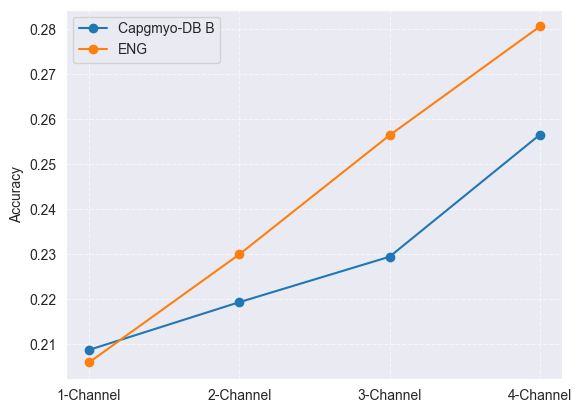

In [11]:
import matplotlib.pyplot as plt

capgmyo_B = [0.208717104, 0.2193092105, 0.22940131800000002, 0.25649342150000004]
capgmyo_B_std =  [0.03602649589936168,  0.032957359367422695,  0.035270190524301345,  0.04140359535362542]
eng_ours = [0.20592691832118565,  0.22991960992415747, 0.25636376980278227, 0.28052006037367714]
eng_ours_std = [0.05375169177908187, 0.08492193274795812, 0.08343234445005425, 0.09487073400413076]

x_label = [f'{i}-Channel' for i in range(1,5)]
x = range(len(x_label))

#plt.errorbar(x, capgmyo_B, yerr=capgmyo_B_std, fmt='o-', capsize=5, label="Capgmyo B")
#plt.errorbar(x, eng_ours, yerr=eng_ours_std, fmt='o-', capsize=5, label="ENG Ours")

plt.plot(x, capgmyo_B, marker='o', label="Capgmyo-DB B")
plt.plot(x, eng_ours, marker='o', label="ENG")

plt.xticks(x, x_label)
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


anp.array(acc_lst_ch3)atotal 10 sessions - training on 9 / testing on 1

ours: